In [1]:
from datetime import datetime
import pandas as pd 
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
from scipy.optimize import minimize
import scipy.stats
from scipy import stats
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter('ignore')

In [6]:
ABBELECTRIC_univariate=pd.read_csv("ABBELECTRIC_univariate.csv",sep=';')
rawdata=ABBELECTRIC_univariate
rawdata.shape

(352, 9)

In [7]:
rawdata.head()

,Choice,Price,Energy,Maintenance,Warranty,Spare,Install,Solver,Quality
0,0,6,6,7,6,6,5,7,5
1,1,6,6,6,7,9,9,7,5
2,0,6,5,7,5,3,4,7,6
3,0,5,5,6,7,8,2,6,5
4,0,3,4,5,4,4,5,6,4


In [15]:
rawdata.describe()

,Choice,Price,Energy,Maintenance,Warranty,Spare,Install,Solver,Quality,fittedvalues
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,0.250000,4.511364,4.840909,5.659091,5.230114,5.147727,5.207386,5.857955,4.735795,0.250000
std,0.433629,1.244881,1.092699,1.158507,2.027138,1.767318,1.914007,1.140922,1.112515,0.177204
min,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,2.000000,0.005348
25%,0.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,0.111268
50%,0.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,6.000000,5.000000,0.207845
75%,0.250000,5.000000,6.000000,6.000000,7.000000,6.000000,7.000000,7.000000,6.000000,0.371515
max,1.000000,7.000000,7.000000,9.000000,9.000000,9.000000,9.000000,9.000000,7.000000,0.802775


In [4]:
#################################
#### Classification         ####
#### Logistic Regression    ####
#################################
exo=rawdata.iloc[:, 1:9] #exogenous variables
exo=sm.add_constant(exo) #add constant to the exogenous variables
logreg = sm.GLM(rawdata['Choice'], exo, family=sm.families.Binomial()) 
logreg1=logreg.fit()
print(logreg1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Choice   No. Observations:                  352
Model:                            GLM   Df Residuals:                      343
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -167.76
Date:                Thu, 11 Feb 2021   Deviance:                       335.52
Time:                        10:38:50   Pearson chi2:                     319.
No. Iterations:                     5   Covariance Type:             nonrobust
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.6287      1.025     -6.465      0.000      -8.638      -4.619
Price           0.3925      0.204      1.920     

In [8]:
#fitted probabilities of having a 1 in the Choice variable for each line 
rawdata['fittedvalues']=logreg1.fittedvalues

In [9]:
rawdata.head()

,Choice,Price,Energy,Maintenance,Warranty,Spare,Install,Solver,Quality,fittedvalues
0,0,6,6,7,6,6,5,7,5,0.415791
1,1,6,6,6,7,9,9,7,5,0.589753
2,0,6,5,7,5,3,4,7,6,0.308819
3,0,5,5,6,7,8,2,6,5,0.256935
4,0,3,4,5,4,4,5,6,4,0.078586


In [10]:
purchase=rawdata[rawdata['Choice']==1].fittedvalues
purchase.shape

(88,)

In [11]:
nonpurchase=rawdata[rawdata['Choice']==0].fittedvalues
nonpurchase.shape

(264,)

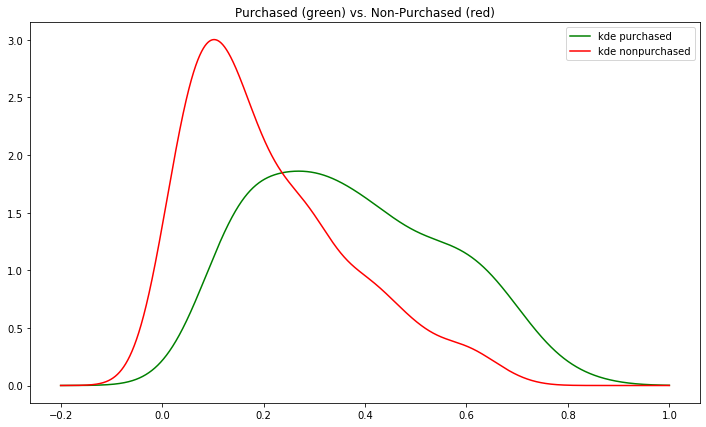

In [12]:
#estimate Gaussian kernel density estimators
p=stats.gaussian_kde(purchase)
nonp=stats.gaussian_kde(nonpurchase)
ind = np.linspace(-.2,1,10000)
kdepdf = p.evaluate(ind)
nonpkdepdf = nonp.evaluate(ind)
plt.figure(figsize=(12,7))
# plot estimated density
plt.plot(ind, kdepdf, label='kde purchased', color="g")
plt.plot(ind, nonpkdepdf , label='kde nonpurchased', color="r")
plt.title('Purchased (green) vs. Non-Purchased (red)')
plt.legend()
plt.show()

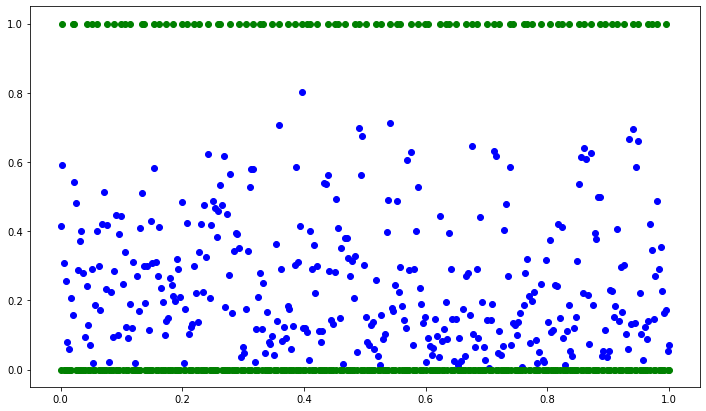

In [17]:
#plot fitted probabilities against true values
import matplotlib.pyplot as plt
pred=logreg1.predict()
t = np.linspace(0,1,352)
plt.figure(figsize=(12,7))
plt.plot(t, pred, 'bo')
plt.plot(t, rawdata['Choice'], 'go')
plt.show()

In [18]:
confusion_matrix(rawdata['Choice'],rawdata['fittedvalues'].round())

array([[249,  15],
       [ 65,  23]])

In [21]:
threshold=0.25
rawdata['classified']=(rawdata['fittedvalues']>threshold)*1

In [22]:
rawdata.head()

,Choice,Price,Energy,Maintenance,Warranty,Spare,Install,Solver,Quality,fittedvalues,classified
0,0,6,6,7,6,6,5,7,5,0.415791,1
1,1,6,6,6,7,9,9,7,5,0.589753,1
2,0,6,5,7,5,3,4,7,6,0.308819,1
3,0,5,5,6,7,8,2,6,5,0.256935,1
4,0,3,4,5,4,4,5,6,4,0.078586,0


In [23]:
#you can do this to try but makes not much sense to me
confusion_matrix(rawdata['Choice'],rawdata['classified'].round())

array([[176,  88],
       [ 27,  61]])

In [36]:
#Decide the cutoff and make the confusion matrix
#threshold=0.001
threshold=0.25
rawdata['classified']=(rawdata['fittedvalues']>threshold)*1
confusion_matrix(rawdata['Choice'],rawdata['classified']) # True (0-1) / Predicted (0-1)

array([[176,  88],
       [ 27,  61]])

In [37]:
#threshold=0.001
threshold=0.25
rawdata['classified']=(rawdata['fittedvalues']>threshold)*1
confusion_matrix(rawdata['classified'],rawdata['Choice']) #Predicted / True (as in slides)

array([[176,  27],
       [ 88,  61]])

In [47]:
mconf=confusion_matrix(rawdata['classified'],rawdata['Choice']) #Predicted / True
hitrate = (mconf[0,0]+mconf[1,1])/sum(sum(mconf))
hitrate*100

67.32954545454545

In [49]:
#what happens is we classify all = 0 
rawdata['naive']= 0
rawdata.head()

,Choice,Price,Energy,Maintenance,Warranty,Spare,Install,Solver,Quality,fittedvalues,classified,naive
0,0,6,6,7,6,6,5,7,5,0.415791,1,0
1,1,6,6,6,7,9,9,7,5,0.589753,1,0
2,0,6,5,7,5,3,4,7,6,0.308819,1,0
3,0,5,5,6,7,8,2,6,5,0.256935,1,0
4,0,3,4,5,4,4,5,6,4,0.078586,0,0


In [50]:
confusion_matrix(rawdata['classified'],rawdata['naive']) #Predicted / True (as in slides)

array([[203,   0],
       [149,   0]])

In [51]:
#reality check if all this stuff is worthile? It is.
mconf=confusion_matrix(rawdata['classified'],rawdata['naive']) #Predicted / True (as in slides)
hitrate = (mconf[0,0]+mconf[1,1])/sum(sum(mconf))
hitrate*100

57.67045454545454